<a href="https://colab.research.google.com/github/dchung0714/dchung0714/blob/main/Heart%20disease%20predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score
from sklearn. metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

import numpy as np
from random import randint

from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [ ]:
df = pd.read_csv("healthcare-dataset-stroke-data.csv")
df.head(20)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
7,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
9,60491,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1


In [ ]:
df['stroke'].value_counts()

0    4861
1     249
Name: stroke, dtype: int64

In [ ]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [ ]:
for i in range(0, 5110):
  entry = df.iloc[i, 9]
  if np.isnan(entry):
    rd = randint(20, 40)
    df.iloc[i, 9] = rd

In [ ]:
df.head(20)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,32.0,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
7,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,21.0,Unknown,1
9,60491,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1


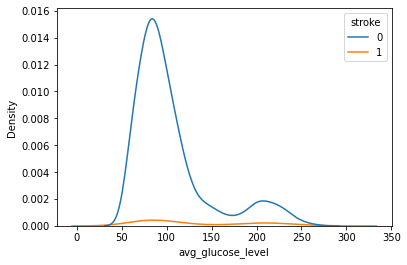

In [ ]:
sns.kdeplot(data=df, x='avg_glucose_level', hue='stroke')

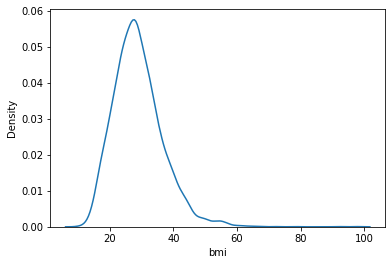

In [ ]:
sns.kdeplot(data=df, x='bmi')

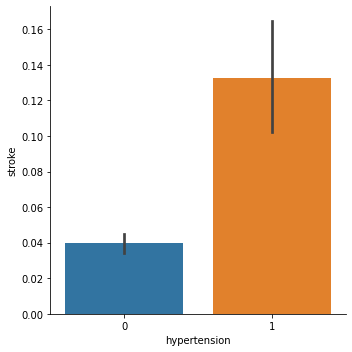

In [ ]:
sns.catplot(data=df, x='hypertension', y='stroke', kind="bar")
plt.show()

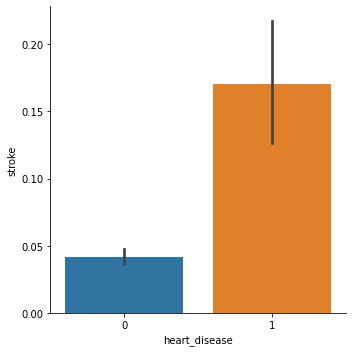

In [ ]:
sns.catplot(data=df, x='heart_disease', y='stroke', kind="bar")
plt.show()

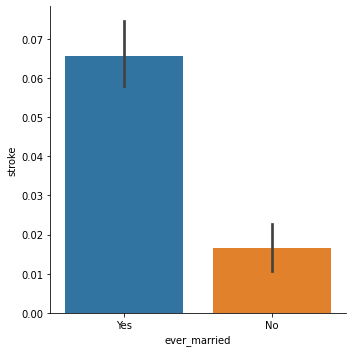

In [ ]:
sns.catplot(data=df, x='ever_married', y='stroke', kind="bar")
plt.show()

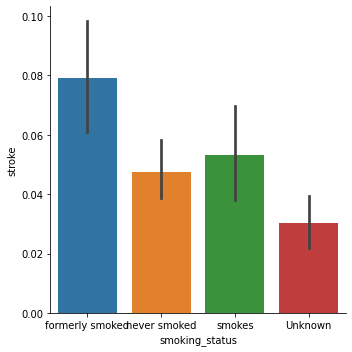

In [ ]:
sns.catplot(data=df, x='smoking_status', y='stroke', kind="bar")
plt.show()

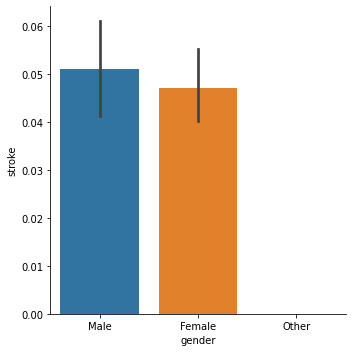

In [ ]:
sns.catplot(data=df, x='gender', y='stroke', kind="bar")
plt.show()

In [ ]:
feature_set = df.iloc[:0:10]
feature_set.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke


In [ ]:
df_feature = pd.get_dummies(data = df, columns=[
                                   'gender',
                                   'ever_married',
                                   'work_type',
                                   'Residence_type',
                                   'smoking_status',],drop_first=True)

In [ ]:
del df_feature['stroke']
df_feature.head()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Male,gender_Other,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,9046,67.0,0,1,228.69,36.6,1,0,1,0,1,0,0,1,1,0,0
1,51676,61.0,0,0,202.21,32.0,0,0,1,0,0,1,0,0,0,1,0
2,31112,80.0,0,1,105.92,32.5,1,0,1,0,1,0,0,0,0,1,0
3,60182,49.0,0,0,171.23,34.4,0,0,1,0,1,0,0,1,0,0,1
4,1665,79.0,1,0,174.12,24.0,0,0,1,0,0,1,0,0,0,1,0


In [ ]:
X = df_feature.iloc[:,7:17]
X.head()

,gender_Other,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,0,1,0,1,0,0,1,1,0,0
1,0,1,0,0,1,0,0,0,1,0
2,0,1,0,1,0,0,0,0,1,0
3,0,1,0,1,0,0,1,0,0,1
4,0,1,0,0,1,0,0,0,1,0


In [ ]:
y = df.iloc[:,11]
y.head()

0    1
1    1
2    1
3    1
4    1
Name: stroke, dtype: int64

In [ ]:
X_train , X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
pred_y = model.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, pred_y)
accuracy


0.958904109589041

In [ ]:
cm = confusion_matrix(y_test,pred_y)
cm

array([[980,   0],
       [ 42,   0]])

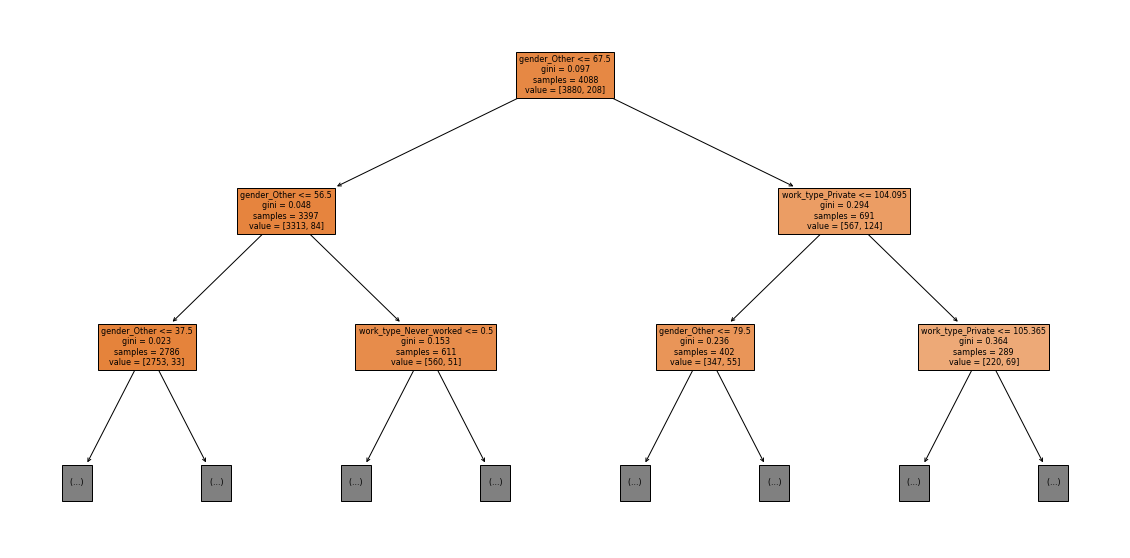

In [ ]:
fig = plt.figure(figsize=(20,10))
tree.plot_tree(model,feature_names=list(X_train),filled=True, max_depth=2)
plt.show()

In [ ]:
classifer = SVC()
classifer.fit(X_train, y_train)

SVC()

In [ ]:
predicted_test_y = classifer.predict(X_test)

In [ ]:
acy = accuracy_score(y_test, predicted_test_y)
acy

0.958904109589041

In [ ]:
rp = classification_report(y_test, predicted_test_y)
print(rp)

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       980
           1       0.00      0.00      0.00        42

    accuracy                           0.96      1022
   macro avg       0.48      0.50      0.49      1022
weighted avg       0.92      0.96      0.94      1022



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Creating new dataset for first 8 columns

In [ ]:
a = df_feature.iloc[:,0:7]
a.head()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Male
0,9046,67.0,0,1,228.69,36.6,1
1,51676,61.0,0,0,202.21,32.0,0
2,31112,80.0,0,1,105.92,32.5,1
3,60182,49.0,0,0,171.23,34.4,0
4,1665,79.0,1,0,174.12,24.0,0


In [ ]:
del a['id']
a.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Male
0,67.0,0,1,228.69,36.6,1
1,61.0,0,0,202.21,32.0,0
2,80.0,0,1,105.92,32.5,1
3,49.0,0,0,171.23,34.4,0
4,79.0,1,0,174.12,24.0,0


In [ ]:
b = df.iloc[:,11]
b.head()

0    1
1    1
2    1
3    1
4    1
Name: stroke, dtype: int64

In [ ]:
a_train , a_test, b_train, b_test = train_test_split(a, b, test_size=0.2)

In [ ]:
model = DecisionTreeClassifier()
model.fit(a_train, b_train)

DecisionTreeClassifier()

In [ ]:
pred_b = model.predict(a_test)

In [ ]:
accuracy = accuracy_score(b_test, pred_b)
accuracy

0.9090019569471625

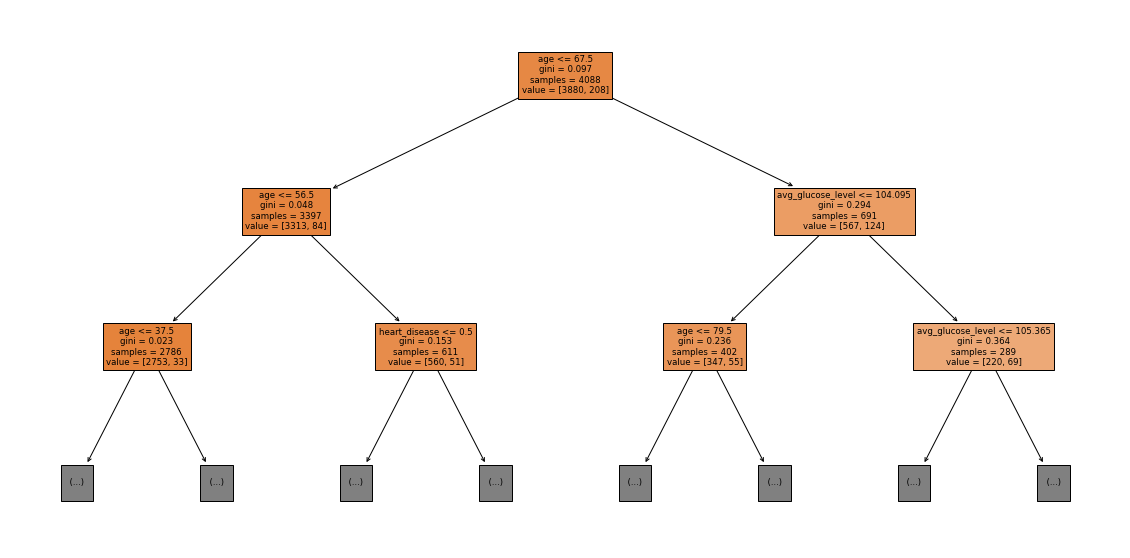

In [ ]:
fig = plt.figure(figsize=(20,10))
tree.plot_tree(model,feature_names=list(a_train),filled=True, max_depth=2)
plt.show()

In [ ]:
classifer = SVC()
classifer.fit(a_train, b_train)

SVC()

In [ ]:
predicted_test_b = classifer.predict(a_test)


In [ ]:
acy = accuracy_score(y_test, predicted_test_y)
acy

0.958904109589041

In [ ]:
rp = classification_report(b_test, predicted_test_b)
print(rp)

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       981
           1       0.00      0.00      0.00        41

    accuracy                           0.96      1022
   macro avg       0.48      0.50      0.49      1022
weighted avg       0.92      0.96      0.94      1022



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
!jupyter nbconvert --to html complete_banaproject.ipynb

[NbConvertApp] Converting notebook complete_banaproject.ipynb to html
[NbConvertApp] Writing 568849 bytes to complete_banaproject.html
